# Using Reddit's API for Predicting Comments

In this project, we will practice two major skills. Collecting data via an API request and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. 

*NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:
```python
res = requests.get(URL)
```

This is because Reddit has throttled python's default user agent. You'll need to set a custom `User-agent` to get your request to work.
```python
res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})
```

In [2]:
import requests
import json

In [3]:
URL = "http://www.reddit.com/hot.json"

In [4]:
## YOUR CODE HERE

#### Use `res.json()` to convert the response into a dictionary format and set this to a variable. 

```python
data = res.json()
```

#### Getting more results

By default, Reddit will give you the top 25 posts:

```python
print(len(data['data']['children']))
```

If you want more, you'll need to do two things:
1. Get the name of the last post: `data['data']['after']`
2. Use that name to hit the following url: `http://www.reddit.com/hot.json?after=THE_AFTER_FROM_STEP_1`
3. Create a loop to repeat steps 1 and 2 until you have a sufficient number of posts. 

*NOTE*: Reddit will limit the number of requests per second you're allowed to make. When you create your loop, be sure to add the following after each iteration.

```python
time.sleep(3) # sleeps 3 seconds before continuing```

This will throttle your loop and keep you within Reddit's guidelines. You'll need to import the `time` library for this to work!

In [5]:
## YOUR CODE HERE

## (Optional) Collect more information

While we only require you to collect four features, there may be other info that you can find on the results page that might be useful. Feel free to write more functions so that you have more interesting and useful data.

In [6]:
## YOUR CODE HERE
#from 80 choose 10 features
    #downs, num_comments, num_crossposts, num_reports, post_categories, score (aka upvotes?), view_count

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

## Predicting comments using Random Forests + Another Classifier

#### Load in the the data of scraped results

In [7]:
## YOUR CODE HERE
import pickle
import pandas as pd

with open('posts1.pkl','rb') as f:
    posts = pickle.load(f)

In [9]:
#47 words in post 50
print(posts[50]['data']['title'])
print(len(str(posts[50]['data']['title']).split()))
str(posts[50]['data']['title'].split())


TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them.
47


"['TIL', 'Donnie', 'Yen', '(the', 'blind', 'monk', 'in', 'Star', 'Wars:', 'Rogue', 'One/star', 'of', 'the', 'Ip', 'Man', 'films)', 'was', 'once', 'leaving', 'a', 'Hong', 'Kong', 'nightclub', 'with', 'his', 'girlfriend', 'when', 'they', 'were', 'attacked', 'by', 'a', 'gang', 'who', 'had', 'been', 'bothering', 'them', 'earlier', 'in', 'the', 'night.', 'Donnie', 'hospitalised', '8', 'of', 'them.']"

In [39]:
import numpy as np

posts_comments = []
posts_scores = []
posts_titles = []

for i in range(len(posts)):
    #post comments
    comments = posts[i]['data']['num_comments']
    posts_comments.append(comments)
    
    #score ==> upvote
    scores = posts[i]['data']['score']
    posts_scores.append(scores)
    
    #post text
    titles = posts[i]['data']['title']
    posts_titles.append(titles)

posts_comments = np.array(posts_comments)
posts_scores = np.array(posts_scores)
posts_titles = np.array(posts_titles)

In [83]:
pd.DataFrame(data = pd.Series(posts_titles).value_counts(), index = None)


,0
me🐨irl,400
ABC cancels Roseanne Barr's sitcom after her tweet about black Obama aide Valerie Jarrett,400
'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me',400
Advanced Pettiness™️,400
Millionaire meets billionaire,400
juicin',400
North Face stole my photo and put it on their shirts without asking,400
This guy is gold,400
A friend went for a walk the other night and saw this woman just standing on a roof,400
Cosplay Starter Pack,400


In [12]:
print(' average comments/post:', int(posts_comments.mean()), 
      '\n',
      'median comments/post:', int(np.median(posts_comments)),
      '\n',
     'max comments/post:', posts_comments.max(),
      '\n',
     'min comments/post:', posts_comments.min())

 average comments/post: 1493 
 median comments/post: 461 
 max comments/post: 11274 
 min comments/post: 46


In [55]:
reddit = pd.DataFrame({'comments': posts_comments,
                       'upvotes' : posts_scores,
                       'titles': posts_titles})

reddit[(reddit['comments'] >= 5000) & (reddit['comments']<10000)].sort_values(by = 'comments')

,comments,titles,upvotes
9981,5861,ABC cancels Roseanne Barr's sitcom after her t...,49828
7181,5861,ABC cancels Roseanne Barr's sitcom after her t...,49625
7156,5861,ABC cancels Roseanne Barr's sitcom after her t...,49623
7131,5861,ABC cancels Roseanne Barr's sitcom after her t...,49625
7106,5861,ABC cancels Roseanne Barr's sitcom after her t...,49620
7081,5861,ABC cancels Roseanne Barr's sitcom after her t...,49620
7056,5861,ABC cancels Roseanne Barr's sitcom after her t...,49620
7031,5861,ABC cancels Roseanne Barr's sitcom after her t...,49614
7006,5861,ABC cancels Roseanne Barr's sitcom after her t...,49623
6981,5861,ABC cancels Roseanne Barr's sitcom after her t...,49622


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

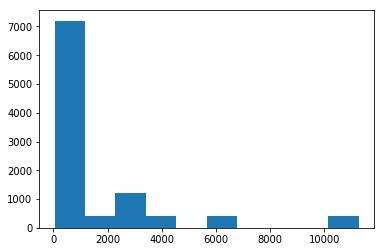

In [15]:
plt.hist(posts_comments);

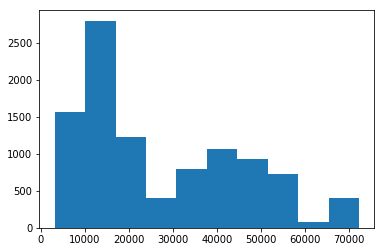

In [17]:
plt.hist(posts_scores);

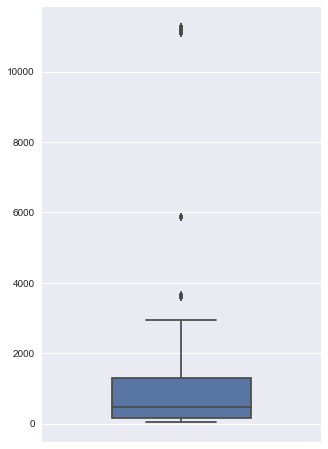

In [126]:
#from stack overflow: setting figsize
sns.set(rc={'figure.figsize':(5,8)})

sns.boxplot(posts_comments, orient = 'v', width = 0.5);

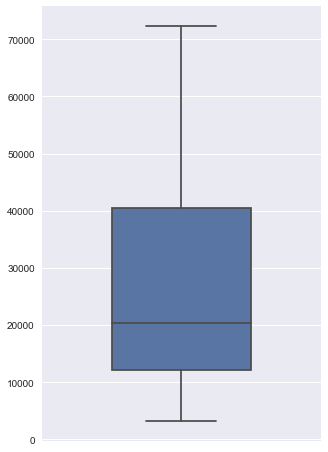

In [19]:
sns.set(rc={'figure.figsize':(5,8)})

sns.boxplot(posts_scores, orient = 'v', width = 0.5);

In [25]:
pd.DataFrame(posts)

,data,kind
0,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
1,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
2,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
3,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
4,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
5,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
6,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
7,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
8,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
9,"{'is_crosspostable': False, 'subreddit_id': 't...",t3


In [38]:
posts_comments = []

for i in range(len(posts)):
    comments = posts[i]['data']['num_comments']
    if comments < 1000:
        print('post #:', i, 'comments #:', comments,
             'post upvotes: ', posts[i]['data']['score'])
        print('post:', posts[i]['data']['title'], '\n')
        posts_comments.append(comments)

print(len(posts_comments))


post #: 0 comments #: 802 post upvotes:  17978
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 1 comments #: 154 post upvotes:  11740
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 3 comments #: 125 post upvotes:  11593
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 4 comments #: 103 post upvotes:  8642
post: This guy is gold 

post #: 5 comments #: 162 post upvotes:  11694
post: G O O D G I R L E ated a bumble 

post #: 8 comments #: 171 post upvotes:  14932
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 10 comments #: 420 post upvotes:  19064
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 11 comments #: 572 post upvotes:  34348
post: Sea lion

post #: 161 comments #: 882 post upvotes:  21136
post: Cosplay Starter Pack 

post #: 162 comments #: 572 post upvotes:  34383
post: Sea lion changing benches to get out of the sun 

post #: 163 comments #: 389 post upvotes:  27228
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 164 comments #: 168 post upvotes:  4204
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 166 comments #: 129 post upvotes:  8155
post: me🐨irl 

post #: 167 comments #: 439 post upvotes:  4777
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 168 comments #: 410 post upvotes:  16021
post: Mini rice ball maker 

post #: 171 comments #: 46 post upvotes:  101

post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 336 comments #: 883 post upvotes:  21155
post: Cosplay Starter Pack 

post #: 337 comments #: 572 post upvotes:  34394
post: Sea lion changing benches to get out of the sun 

post #: 338 comments #: 389 post upvotes:  27272
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 339 comments #: 168 post upvotes:  4207
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 341 comments #: 130 post upvotes:  8160
post: me🐨irl 

post #: 342 comments #: 441 post upvotes:  4786
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 343 comments #: 410 post upvotes:  16032

post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 510 comments #: 424 post upvotes:  19140
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 511 comments #: 884 post upvotes:  21165
post: Cosplay Starter Pack 

post #: 512 comments #: 572 post upvotes:  34429
post: Sea lion changing benches to get out of the sun 

post #: 513 comments #: 389 post upvotes:  27293
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 514 comments #: 168 post upvotes:  4220
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 516 comments #: 130 post upvotes:  8178
post: me🐨irl 

post #: 517 comments #: 441 post upvotes:  4800
post: Meant to text 

post: G O O D G I R L E ated a bumble 

post #: 682 comments #: 172 post upvotes:  15109
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 685 comments #: 424 post upvotes:  19160
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 686 comments #: 885 post upvotes:  21179
post: Cosplay Starter Pack 

post #: 687 comments #: 573 post upvotes:  34470
post: Sea lion changing benches to get out of the sun 

post #: 688 comments #: 389 post upvotes:  27320
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 689 comments #: 168 post upvotes:  4228
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 691 comments #: 130 post upvotes: 

post: This guy is gold 

post #: 855 comments #: 164 post upvotes:  11822
post: G O O D G I R L E ated a bumble 

post #: 857 comments #: 172 post upvotes:  15139
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 860 comments #: 427 post upvotes:  19189
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 861 comments #: 885 post upvotes:  21196
post: Cosplay Starter Pack 

post #: 862 comments #: 574 post upvotes:  34500
post: Sea lion changing benches to get out of the sun 

post #: 863 comments #: 389 post upvotes:  27359
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 864 comments #: 168 post upvotes:  4241
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impress

post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 1029 comments #: 104 post upvotes:  8826
post: This guy is gold 

post #: 1030 comments #: 166 post upvotes:  11845
post: G O O D G I R L E ated a bumble 

post #: 1032 comments #: 172 post upvotes:  15172
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 1035 comments #: 427 post upvotes:  19214
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 1036 comments #: 885 post upvotes:  21208
post: Cosplay Starter Pack 

post #: 1037 comments #: 574 post upvotes:  34535
post: Sea lion changing benches to get out of the sun 

post #: 1038 comments #: 389 post upvotes:  27395
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 1039 comments #: 168 post upvotes:  4243
post: Found a rock on the porch of my new home, flipped it over and saw this. Is


post #: 1203 comments #: 126 post upvotes:  11715
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 1204 comments #: 105 post upvotes:  8863
post: This guy is gold 

post #: 1205 comments #: 166 post upvotes:  11865
post: G O O D G I R L E ated a bumble 

post #: 1207 comments #: 172 post upvotes:  15217
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 1210 comments #: 429 post upvotes:  19237
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 1211 comments #: 885 post upvotes:  21228
post: Cosplay Starter Pack 

post #: 1212 comments #: 574 post upvotes:  34569
post: Sea lion changing benches to get out of the sun 

post #: 1213 comments #: 390 post upvotes:  27427
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 1214 comments #: 168 post upvotes:  4254
post: Found a rock on the por

post #: 1376 comments #: 155 post upvotes:  12090
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 1378 comments #: 126 post upvotes:  11740
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 1379 comments #: 106 post upvotes:  8886
post: This guy is gold 

post #: 1380 comments #: 166 post upvotes:  11886
post: G O O D G I R L E ated a bumble 

post #: 1382 comments #: 172 post upvotes:  15260
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 1385 comments #: 430 post upvotes:  19279
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 1386 comments #: 886 post upvotes:  21246
post: Cosplay Starter Pack 

post #: 1387 comments #: 574 post upvotes:  34592
post: Sea lion changing benches to get out of the sun 

post #: 1388 comments #: 390 post upvotes:  27455
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its th

post #: 1550 comments #: 831 post upvotes:  18637
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 1551 comments #: 155 post upvotes:  12138
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 1553 comments #: 126 post upvotes:  11750
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 1554 comments #: 106 post upvotes:  8913
post: This guy is gold 

post #: 1555 comments #: 166 post upvotes:  11902
post: G O O D G I R L E ated a bumble 

post #: 1557 comments #: 172 post upvotes:  15307
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 1560 comments #: 430 post upvotes:  19299
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 1561 comments #: 574 post upvotes:

post #: 1724 comments #: 285 post upvotes:  13197
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 1725 comments #: 835 post upvotes:  18704
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 1726 comments #: 155 post upvotes:  12174
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 1728 comments #: 126 post upvotes:  11767
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 1729 comments #: 106 post upvotes:  8930
post: This guy is gold 

post #: 1730 comments #: 167 post upvotes:  11916
post: G O O D G I R L E ated a bumble 

post #: 1732 comments #: 172 post upvotes:  15343
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 1735 comments #: 430 post upvote

post #: 1896 comments #: 46 post upvotes:  10250
post: juicin' 

post #: 1899 comments #: 285 post upvotes:  13203
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 1900 comments #: 836 post upvotes:  18783
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 1901 comments #: 156 post upvotes:  12216
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 1903 comments #: 126 post upvotes:  11796
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 1904 comments #: 106 post upvotes:  8964
post: This guy is gold 

post #: 1905 comments #: 167 post upvotes:  11940
post: G O O D G I R L E ated a bumble 

post #: 1907 comments #: 174 post upvotes:  15378
post: Easy... Easy.... EEEas

post #: 2068 comments #: 411 post upvotes:  16113
post: Mini rice ball maker 

post #: 2071 comments #: 46 post upvotes:  10260
post: juicin' 

post #: 2074 comments #: 285 post upvotes:  13202
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 2075 comments #: 839 post upvotes:  18863
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 2076 comments #: 156 post upvotes:  12266
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 2078 comments #: 127 post upvotes:  11818
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 2079 comments #: 108 post upvotes:  9010
post: This guy is gold 

post #: 2080 comments #: 168 post upvotes:  11964
post: G O O D G I R L E ated a bumble 


post #: 2242 comments #: 448 post upvotes:  4914
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 2243 comments #: 411 post upvotes:  16122
post: Mini rice ball maker 

post #: 2246 comments #: 46 post upvotes:  10269
post: juicin' 

post #: 2249 comments #: 285 post upvotes:  13212
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 2250 comments #: 840 post upvotes:  18937
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 2251 comments #: 157 post upvotes:  12318
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 2253 comments #: 127 post upvotes:  11841
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 2254 comments #: 109 post upvote

post #: 2415 comments #: 131 post upvotes:  8319
post: me🐨irl 

post #: 2417 comments #: 448 post upvotes:  4921
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 2418 comments #: 411 post upvotes:  16128
post: Mini rice ball maker 

post #: 2421 comments #: 46 post upvotes:  10284
post: juicin' 

post #: 2424 comments #: 285 post upvotes:  13214
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 2425 comments #: 847 post upvotes:  19002
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 2426 comments #: 157 post upvotes:  12366
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 2428 comments #: 127 post upvotes:  11867
post: MRW my wife and I hear a faint noise that sounds like a dog 

post #: 2589 comments #: 168 post upvotes:  4311
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 2590 comments #: 132 post upvotes:  8342
post: me🐨irl 

post #: 2592 comments #: 448 post upvotes:  4928
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 2593 comments #: 411 post upvotes:  16129
post: Mini rice ball maker 

post #: 2596 comments #: 46 post upvotes:  10287
post: juicin' 

post #: 2599 comments #: 285 post upvotes:  13215
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 2600 comments #: 850 post upvotes:  19065
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who h

post #: 2763 comments #: 393 post upvotes:  27672
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 2764 comments #: 168 post upvotes:  4314
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 2765 comments #: 132 post upvotes:  8346
post: me🐨irl 

post #: 2767 comments #: 448 post upvotes:  4951
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 2768 comments #: 412 post upvotes:  16135
post: Mini rice ball maker 

post #: 2771 comments #: 46 post upvotes:  10301
post: juicin' 

post #: 2774 comments #: 285 post upvotes:  13218
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 2775 comments #: 853 po

post #: 2937 comments #: 891 post upvotes:  21352
post: Cosplay Starter Pack 

post #: 2938 comments #: 393 post upvotes:  27704
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 2939 comments #: 168 post upvotes:  4323
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 2940 comments #: 132 post upvotes:  8366
post: me🐨irl 

post #: 2942 comments #: 449 post upvotes:  4957
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 2943 comments #: 412 post upvotes:  16132
post: Mini rice ball maker 

post #: 2946 comments #: 46 post upvotes:  10297
post: juicin' 

post #: 2949 comments #: 285 post upvotes:  13233
post: Me at 9, wearing all my

post #: 3111 comments #: 576 post upvotes:  34889
post: Sea lion changing benches to get out of the sun 

post #: 3112 comments #: 891 post upvotes:  21364
post: Cosplay Starter Pack 

post #: 3113 comments #: 393 post upvotes:  27747
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 3114 comments #: 168 post upvotes:  4339
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 3115 comments #: 134 post upvotes:  8379
post: me🐨irl 

post #: 3117 comments #: 450 post upvotes:  4959
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 3118 comments #: 412 post upvotes:  16143
post: Mini rice ball maker 

post #: 3121 comments #: 46 post upvot

post #: 3285 comments #: 432 post upvotes:  19576
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 3286 comments #: 576 post upvotes:  34925
post: Sea lion changing benches to get out of the sun 

post #: 3287 comments #: 891 post upvotes:  21386
post: Cosplay Starter Pack 

post #: 3288 comments #: 393 post upvotes:  27772
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 3289 comments #: 168 post upvotes:  4347
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 3290 comments #: 134 post upvotes:  8390
post: me🐨irl 

post #: 3292 comments #: 451 post upvotes:  4972
post: Meant to text my mom, accidentally responded to the woman in

post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 3460 comments #: 432 post upvotes:  19602
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 3461 comments #: 576 post upvotes:  34959
post: Sea lion changing benches to get out of the sun 

post #: 3462 comments #: 891 post upvotes:  21399
post: Cosplay Starter Pack 

post #: 3463 comments #: 393 post upvotes:  27803
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 3464 comments #: 168 post upvotes:  4349
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 3465 comments #: 134 post upvotes:  8395
post: me🐨irl 

post #: 3467 comments #: 451 post upvotes:  4986
post: Meant t

post #: 3717 comments #: 454 post upvotes:  4999
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 3718 comments #: 412 post upvotes:  16161
post: Mini rice ball maker 

post #: 3721 comments #: 46 post upvotes:  10338
post: juicin' 

post #: 3724 comments #: 285 post upvotes:  13255
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 3725 comments #: 869 post upvotes:  19477
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 3726 comments #: 160 post upvotes:  12687
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 3728 comments #: 128 post upvotes:  11987
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 3729 comments #: 111 post upvote

post #: 3890 comments #: 135 post upvotes:  8424
post: me🐨irl 

post #: 3892 comments #: 456 post upvotes:  5004
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 3893 comments #: 412 post upvotes:  16175
post: Mini rice ball maker 

post #: 3896 comments #: 46 post upvotes:  10350
post: juicin' 

post #: 3899 comments #: 285 post upvotes:  13262
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 3900 comments #: 873 post upvotes:  19542
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 3901 comments #: 160 post upvotes:  12745
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 3903 comments #: 128 post upvotes:  12004
post: MRW my wife and I hear a faint noise that sounds like a dog 

post #: 4064 comments #: 168 post upvotes:  4374
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 4065 comments #: 135 post upvotes:  8438
post: me🐨irl 

post #: 4067 comments #: 456 post upvotes:  5011
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 4068 comments #: 412 post upvotes:  16178
post: Mini rice ball maker 

post #: 4071 comments #: 46 post upvotes:  10357
post: juicin' 

post #: 4074 comments #: 285 post upvotes:  13271
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 4075 comments #: 879 post upvotes:  19604
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who h

post #: 4238 comments #: 396 post upvotes:  27933
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 4239 comments #: 168 post upvotes:  4377
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 4240 comments #: 135 post upvotes:  8444
post: me🐨irl 

post #: 4242 comments #: 456 post upvotes:  5016
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 4243 comments #: 412 post upvotes:  16173
post: Mini rice ball maker 

post #: 4246 comments #: 46 post upvotes:  10368
post: juicin' 

post #: 4249 comments #: 285 post upvotes:  13272
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 4250 comments #: 882 po

post #: 4412 comments #: 894 post upvotes:  21471
post: Cosplay Starter Pack 

post #: 4413 comments #: 397 post upvotes:  27979
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 4414 comments #: 168 post upvotes:  4389
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 4415 comments #: 135 post upvotes:  8460
post: me🐨irl 

post #: 4417 comments #: 457 post upvotes:  5024
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 4418 comments #: 414 post upvotes:  16187
post: Mini rice ball maker 

post #: 4421 comments #: 46 post upvotes:  10369
post: juicin' 

post #: 4424 comments #: 285 post upvotes:  13272
post: Me at 9, wearing all my

post #: 4586 comments #: 577 post upvotes:  35141
post: Sea lion changing benches to get out of the sun 

post #: 4587 comments #: 894 post upvotes:  21492
post: Cosplay Starter Pack 

post #: 4588 comments #: 397 post upvotes:  27996
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 4589 comments #: 168 post upvotes:  4393
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 4590 comments #: 136 post upvotes:  8475
post: me🐨irl 

post #: 4592 comments #: 459 post upvotes:  5038
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 4593 comments #: 414 post upvotes:  16178
post: Mini rice ball maker 

post #: 4596 comments #: 46 post upvot

post #: 4760 comments #: 434 post upvotes:  19797
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 4761 comments #: 577 post upvotes:  35167
post: Sea lion changing benches to get out of the sun 

post #: 4762 comments #: 895 post upvotes:  21499
post: Cosplay Starter Pack 

post #: 4763 comments #: 397 post upvotes:  28026
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 4764 comments #: 168 post upvotes:  4397
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 4765 comments #: 136 post upvotes:  8489
post: me🐨irl 

post #: 4767 comments #: 460 post upvotes:  5047
post: Meant to text my mom, accidentally responded to the woman in

post #: 4932 comments #: 181 post upvotes:  16057
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 4935 comments #: 435 post upvotes:  19822
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 4936 comments #: 578 post upvotes:  35202
post: Sea lion changing benches to get out of the sun 

post #: 4937 comments #: 896 post upvotes:  21513
post: Cosplay Starter Pack 

post #: 4938 comments #: 398 post upvotes:  28045
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 4939 comments #: 168 post upvotes:  4409
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 4940 comments #: 136 post upvotes:  8501
post: me🐨irl 

post #: 4942

post: G O O D G I R L E ated a bumble 

post #: 5107 comments #: 181 post upvotes:  16096
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 5110 comments #: 435 post upvotes:  19862
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 5111 comments #: 580 post upvotes:  35226
post: Sea lion changing benches to get out of the sun 

post #: 5112 comments #: 896 post upvotes:  21533
post: Cosplay Starter Pack 

post #: 5113 comments #: 398 post upvotes:  28078
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 5114 comments #: 168 post upvotes:  4410
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 5115 comments #: 137 post up

post: This guy is gold 

post #: 5280 comments #: 172 post upvotes:  12369
post: G O O D G I R L E ated a bumble 

post #: 5282 comments #: 181 post upvotes:  16137
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 5285 comments #: 435 post upvotes:  19897
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 5286 comments #: 580 post upvotes:  35267
post: Sea lion changing benches to get out of the sun 

post #: 5287 comments #: 897 post upvotes:  21544
post: Cosplay Starter Pack 

post #: 5288 comments #: 400 post upvotes:  28101
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 5289 comments #: 168 post upvotes:  4421
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence 

post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 5454 comments #: 114 post upvotes:  9509
post: This guy is gold 

post #: 5455 comments #: 172 post upvotes:  12393
post: G O O D G I R L E ated a bumble 

post #: 5457 comments #: 182 post upvotes:  16172
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 5460 comments #: 435 post upvotes:  19924
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 5461 comments #: 581 post upvotes:  35286
post: Sea lion changing benches to get out of the sun 

post #: 5462 comments #: 897 post upvotes:  21554
post: Cosplay Starter Pack 

post #: 5463 comments #: 400 post upvotes:  28128
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 5464 comments #: 168 post upvotes:  4428
post: Found a rock on the porch of my new home, flipped it over and saw this. Is

post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 5628 comments #: 128 post upvotes:  12140
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 5629 comments #: 115 post upvotes:  9544
post: This guy is gold 

post #: 5630 comments #: 172 post upvotes:  12412
post: G O O D G I R L E ated a bumble 

post #: 5632 comments #: 182 post upvotes:  16200
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 5635 comments #: 435 post upvotes:  19949
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 5636 comments #: 583 post upvotes:  35324
post: Sea lion changing benches to get out of the sun 

post #: 5637 comments #: 897 post upvotes:  21561
post: Cosplay Starter Pack 

post #: 5638 comments #: 400 post upvotes:  28178
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 5639 com

post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 5801 comments #: 164 post upvotes:  13249
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 5803 comments #: 128 post upvotes:  12162
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 5804 comments #: 115 post upvotes:  9561
post: This guy is gold 

post #: 5805 comments #: 171 post upvotes:  12434
post: G O O D G I R L E ated a bumble 

post #: 5807 comments #: 182 post upvotes:  16237
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 5810 comments #: 436 post upvotes:  19973
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 5811 comments #: 583 post upvotes:  35350
post: Sea lion changing benches to get out


post #: 5975 comments #: 913 post upvotes:  20338
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 5976 comments #: 165 post upvotes:  13302
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 5978 comments #: 128 post upvotes:  12179
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 5979 comments #: 115 post upvotes:  9595
post: This guy is gold 

post #: 5980 comments #: 171 post upvotes:  12440
post: G O O D G I R L E ated a bumble 

post #: 5982 comments #: 182 post upvotes:  16283
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 5985 comments #: 437 post upvotes:  19996
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 5986 comments #: 585 post upvotes

post #: 6149 comments #: 285 post upvotes:  13327
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 6150 comments #: 915 post upvotes:  20396
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 6151 comments #: 165 post upvotes:  13348
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 6153 comments #: 128 post upvotes:  12204
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 6154 comments #: 116 post upvotes:  9615
post: This guy is gold 

post #: 6155 comments #: 172 post upvotes:  12481
post: G O O D G I R L E ated a bumble 

post #: 6157 comments #: 182 post upvotes:  16314
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 6160 comments #: 438 post upvote

post #: 6321 comments #: 46 post upvotes:  10489
post: juicin' 

post #: 6324 comments #: 285 post upvotes:  13335
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 6325 comments #: 917 post upvotes:  20483
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 6326 comments #: 165 post upvotes:  13392
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 6328 comments #: 128 post upvotes:  12211
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 6329 comments #: 116 post upvotes:  9643
post: This guy is gold 

post #: 6330 comments #: 173 post upvotes:  12488
post: G O O D G I R L E ated a bumble 

post #: 6332 comments #: 182 post upvotes:  16363
post: Easy... Easy.... EEEas

post #: 6493 comments #: 415 post upvotes:  16266
post: Mini rice ball maker 

post #: 6496 comments #: 46 post upvotes:  10498
post: juicin' 

post #: 6499 comments #: 285 post upvotes:  13334
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 6500 comments #: 918 post upvotes:  20549
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 6501 comments #: 165 post upvotes:  13436
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 6503 comments #: 128 post upvotes:  12246
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 6504 comments #: 116 post upvotes:  9665
post: This guy is gold 

post #: 6505 comments #: 173 post upvotes:  12517
post: G O O D G I R L E ated a bumble 


post #: 6666 comments #: 468 post upvotes:  5179
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 6668 comments #: 415 post upvotes:  16265
post: Mini rice ball maker 

post #: 6671 comments #: 46 post upvotes:  10510
post: juicin' 

post #: 6674 comments #: 285 post upvotes:  13344
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 6675 comments #: 921 post upvotes:  20641
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 6676 comments #: 166 post upvotes:  13489
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 6678 comments #: 128 post upvotes:  12264
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 6679 comments #: 116 post upvote

post #: 6840 comments #: 137 post upvotes:  8673
post: me🐨irl 

post #: 6841 comments #: 470 post upvotes:  5195
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 6843 comments #: 416 post upvotes:  16273
post: Mini rice ball maker 

post #: 6846 comments #: 46 post upvotes:  10521
post: juicin' 

post #: 6849 comments #: 286 post upvotes:  13337
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 6850 comments #: 925 post upvotes:  20704
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 6851 comments #: 167 post upvotes:  13528
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 6853 comments #: 128 post upvotes:  12281
post: MRW my wife and I hear a faint noise that sounds like a dog 

post #: 7014 comments #: 168 post upvotes:  4491
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 7015 comments #: 137 post upvotes:  8691
post: me🐨irl 

post #: 7016 comments #: 471 post upvotes:  5205
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 7018 comments #: 416 post upvotes:  16275
post: Mini rice ball maker 

post #: 7021 comments #: 46 post upvotes:  10532
post: juicin' 

post #: 7024 comments #: 286 post upvotes:  13353
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 7025 comments #: 926 post upvotes:  20771
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who h

post #: 7188 comments #: 403 post upvotes:  28438
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 7189 comments #: 167 post upvotes:  4502
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 7190 comments #: 137 post upvotes:  8702
post: me🐨irl 

post #: 7191 comments #: 474 post upvotes:  5215
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 7193 comments #: 416 post upvotes:  16288
post: Mini rice ball maker 

post #: 7196 comments #: 46 post upvotes:  10531
post: juicin' 

post #: 7199 comments #: 286 post upvotes:  13351
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 7200 comments #: 927 po

post #: 7362 comments #: 900 post upvotes:  21679
post: Cosplay Starter Pack 

post #: 7363 comments #: 403 post upvotes:  28463
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 7364 comments #: 167 post upvotes:  4514
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 7365 comments #: 138 post upvotes:  8707
post: me🐨irl 

post #: 7366 comments #: 474 post upvotes:  5222
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 7368 comments #: 416 post upvotes:  16289
post: Mini rice ball maker 

post #: 7371 comments #: 46 post upvotes:  10540
post: juicin' 

post #: 7374 comments #: 287 post upvotes:  13359
post: Me at 9, wearing all my

post #: 7536 comments #: 589 post upvotes:  35638
post: Sea lion changing benches to get out of the sun 

post #: 7537 comments #: 900 post upvotes:  21677
post: Cosplay Starter Pack 

post #: 7538 comments #: 403 post upvotes:  28496
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 7539 comments #: 167 post upvotes:  4516
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 7540 comments #: 138 post upvotes:  8733
post: me🐨irl 

post #: 7541 comments #: 476 post upvotes:  5235
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 7543 comments #: 416 post upvotes:  16302
post: Mini rice ball maker 

post #: 7546 comments #: 46 post upvot

post #: 7710 comments #: 445 post upvotes:  20270
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 7711 comments #: 589 post upvotes:  35655
post: Sea lion changing benches to get out of the sun 

post #: 7712 comments #: 901 post upvotes:  21690
post: Cosplay Starter Pack 

post #: 7713 comments #: 405 post upvotes:  28539
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 7714 comments #: 167 post upvotes:  4525
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 7715 comments #: 138 post upvotes:  8750
post: me🐨irl 

post #: 7716 comments #: 480 post upvotes:  5237
post: Meant to text my mom, accidentally responded to the woman in

post #: 7882 comments #: 184 post upvotes:  16682
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 7885 comments #: 445 post upvotes:  20294
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 7886 comments #: 591 post upvotes:  35682
post: Sea lion changing benches to get out of the sun 

post #: 7887 comments #: 901 post upvotes:  21706
post: Cosplay Starter Pack 

post #: 7888 comments #: 406 post upvotes:  28562
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 7889 comments #: 167 post upvotes:  4522
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 7890 comments #: 138 post upvotes:  8762
post: me🐨irl 

post #: 7891

post #: 8055 comments #: 175 post upvotes:  12730
post: G O O D G I R L E ated a bumble 

post #: 8057 comments #: 184 post upvotes:  16719
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 8060 comments #: 445 post upvotes:  20316
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 8061 comments #: 591 post upvotes:  35714
post: Sea lion changing benches to get out of the sun 

post #: 8062 comments #: 901 post upvotes:  21711
post: Cosplay Starter Pack 

post #: 8063 comments #: 406 post upvotes:  28602
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 8064 comments #: 167 post upvotes:  4531
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part 

post: This guy is gold 

post #: 8230 comments #: 175 post upvotes:  12751
post: G O O D G I R L E ated a bumble 

post #: 8232 comments #: 184 post upvotes:  16753
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 8235 comments #: 447 post upvotes:  20341
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 8236 comments #: 591 post upvotes:  35743
post: Sea lion changing benches to get out of the sun 

post #: 8237 comments #: 901 post upvotes:  21726
post: Cosplay Starter Pack 

post #: 8238 comments #: 406 post upvotes:  28633
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 8239 comments #: 167 post upvotes:  4536
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence 

post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 8404 comments #: 118 post upvotes:  9972
post: This guy is gold 

post #: 8405 comments #: 175 post upvotes:  12764
post: G O O D G I R L E ated a bumble 

post #: 8407 comments #: 184 post upvotes:  16777
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 8410 comments #: 447 post upvotes:  20356
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 8411 comments #: 592 post upvotes:  35772
post: Sea lion changing benches to get out of the sun 

post #: 8412 comments #: 902 post upvotes:  21750
post: Cosplay Starter Pack 

post #: 8413 comments #: 406 post upvotes:  28664
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 8414 comments #: 167 post upvotes:  4552
post: Found a rock on the porch of my new home, flipped it over and saw this. Is

post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 8578 comments #: 128 post upvotes:  12452
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 8579 comments #: 118 post upvotes:  10003
post: This guy is gold 

post #: 8580 comments #: 175 post upvotes:  12792
post: G O O D G I R L E ated a bumble 

post #: 8582 comments #: 184 post upvotes:  16817
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 8585 comments #: 447 post upvotes:  20387
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 8586 comments #: 592 post upvotes:  35797
post: Sea lion changing benches to get out of the sun 

post #: 8587 comments #: 902 post upvotes:  21755
post: Cosplay Starter Pack 

post #: 8588 comments #: 405 post upvotes:  28696
post: Friend took a picture of me spinning my shirt and it looked like a perched crow on my hand. Reddit then did its thing by turning it into reality. 

post #: 8589 co

post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 8751 comments #: 169 post upvotes:  14038
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 8753 comments #: 128 post upvotes:  12459
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 8754 comments #: 118 post upvotes:  10037
post: This guy is gold 

post #: 8755 comments #: 176 post upvotes:  12820
post: G O O D G I R L E ated a bumble 

post #: 8757 comments #: 184 post upvotes:  16866
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 8760 comments #: 448 post upvotes:  20416
post: 'Don't Tread on Me' parody bumper sticker says 'Throw Bread on Me' 

post #: 8761 comments #: 594 post upvotes:  35827
post: Sea lion changing benches to get ou

post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 8925 comments #: 948 post upvotes:  21476
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 8926 comments #: 170 post upvotes:  14079
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 8928 comments #: 128 post upvotes:  12479
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 8929 comments #: 118 post upvotes:  10050
post: This guy is gold 

post #: 8930 comments #: 176 post upvotes:  12854
post: G O O D G I R L E ated a bumble 

post #: 8932 comments #: 184 post upvotes:  16895
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 8935 comments #: 450 post upvotes:  20421
post: 'Don't Tread on Me' parody bumper


post #: 9099 comments #: 289 post upvotes:  13383
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 9100 comments #: 954 post upvotes:  21548
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 9101 comments #: 171 post upvotes:  14121
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 9103 comments #: 129 post upvotes:  12502
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 9104 comments #: 118 post upvotes:  10090
post: This guy is gold 

post #: 9105 comments #: 177 post upvotes:  12875
post: G O O D G I R L E ated a bumble 

post #: 9107 comments #: 184 post upvotes:  16944
post: Easy... Easy.... EEEassssyyyyyyy... perfect. 

post #: 9110 comments #: 450 post upvo

post #: 9271 comments #: 46 post upvotes:  10634
post: juicin' 

post #: 9274 comments #: 289 post upvotes:  13386
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 9275 comments #: 955 post upvotes:  21610
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 9276 comments #: 172 post upvotes:  14175
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 9278 comments #: 130 post upvotes:  12521
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 9279 comments #: 118 post upvotes:  10121
post: This guy is gold 

post #: 9280 comments #: 178 post upvotes:  12903
post: G O O D G I R L E ated a bumble 

post #: 9282 comments #: 184 post upvotes:  16965
post: Easy... Easy.... EEEa

post #: 9443 comments #: 416 post upvotes:  16385
post: Mini rice ball maker 

post #: 9446 comments #: 46 post upvotes:  10637
post: juicin' 

post #: 9447 comments #: 73 post upvotes:  3153
post: Too True 

post #: 9450 comments #: 958 post upvotes:  21667
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 9451 comments #: 172 post upvotes:  14222
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 9453 comments #: 130 post upvotes:  12549
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 9454 comments #: 118 post upvotes:  10166
post: This guy is gold 

post #: 9455 comments #: 178 post upvotes:  12927
post: G O O D G I R L E ated a bumble 

post #: 9457 comments #: 184 post upvotes:  17009
post: Easy

post #: 9616 comments #: 490 post upvotes:  5339
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 9618 comments #: 416 post upvotes:  16386
post: Mini rice ball maker 

post #: 9621 comments #: 46 post upvotes:  10645
post: juicin' 

post #: 9624 comments #: 289 post upvotes:  13386
post: Me at 9, wearing all my favourite items of clothing at the same time 

post #: 9625 comments #: 963 post upvotes:  21733
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 9626 comments #: 172 post upvotes:  14282
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 9628 comments #: 130 post upvotes:  12569
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 9629 comments #: 118 post upvote

post #: 9790 comments #: 139 post upvotes:  8880
post: me🐨irl 

post #: 9791 comments #: 490 post upvotes:  5354
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 9793 comments #: 416 post upvotes:  16402
post: Mini rice ball maker 

post #: 9796 comments #: 46 post upvotes:  10650
post: juicin' 

post #: 9797 comments #: 75 post upvotes:  3192
post: Too True 

post #: 9800 comments #: 964 post upvotes:  21805
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his girlfriend when they were attacked by a gang who had been bothering them earlier in the night. Donnie hospitalised 8 of them. 

post #: 9801 comments #: 172 post upvotes:  14323
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 9803 comments #: 130 post upvotes:  12586
post: MRW my wife and I hear a faint noise that sounds like a dog getting ready to puke 

post #: 9804 comments #: 119 post upvo

post #: 9964 comments #: 167 post upvotes:  4607
post: Found a rock on the porch of my new home, flipped it over and saw this. Is that a fossil? I live in SW Pennsylvania and fossils are very common, but I’m not certain it is one. Looks almost like a chain link fence impression but it’s part of the rock 

post #: 9965 comments #: 139 post upvotes:  8888
post: me🐨irl 

post #: 9966 comments #: 491 post upvotes:  5364
post: Meant to text my mom, accidentally responded to the woman instead 

post #: 9968 comments #: 416 post upvotes:  16405
post: Mini rice ball maker 

post #: 9971 comments #: 46 post upvotes:  10650
post: juicin' 

post #: 9972 comments #: 75 post upvotes:  3213
post: Too True 

post #: 9975 comments #: 172 post upvotes:  14354
post: This Guy Uses Ordinary Objects to Complete his Artwork 

post #: 9976 comments #: 967 post upvotes:  21865
post: TIL Donnie Yen (the blind monk in Star Wars: Rogue One/star of the Ip Man films) was once leaving a Hong Kong nightclub with his

In [ ]:
df = pd.DataFrame(np.array(posts).reshape( , ), columns = list(posts[0][]))

In [54]:
print(len(posts))
type(posts)

posts[0]['data']

#pd.DataFrame(data = posts[0:5]['data'].values(), columns = posts[0]['data'].keys())

#pd.DataFrame(data = posts[0]['data'].values(), columns = posts[0]['data'].keys())
#for i in range(len(posts)):
#    print(pd.DataFrame(data = posts[i][], columns = posts[i]['data'].values()))


10000


{'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': 'esbe1234',
 'author_flair_css_class': None,
 'author_flair_template_id': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'can_gild': False,
 'can_mod_post': False,
 'clicked': False,
 'contest_mode': False,
 'created': 1527654897.0,
 'created_utc': 1527626097.0,
 'distinguished': None,
 'domain': 'en.wikipedia.org',
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'hidden': False,
 'hide_score': False,
 'id': '8n2gl8',
 'is_crosspostable': False,
 'is_reddit_media_domain': False,
 'is_self': False,
 'is_video': False,
 'likes': None,
 'link_flair_css_class': None,
 'link_flair_text': None,
 'locked': False,
 'media': None,
 'media_embed': {},
 'media_only': False,
 'mod_note': None,
 'mod_reason_by': None,
 'mod_reason_title': None,
 'mod_reports': [],
 'name': 't3_8n2gl8',
 'no_follow': False,
 'num_comments': 802,
 'num_crossposts': 1,
 'num_reports': None,
 'over_18': False,
 

In [ ]:
for i in range(len(posts)):
    
    #display(i, posts[i]['data']['title'])

#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

In [ ]:
## YOUR CODE HERE

#### Thought experiment: What is the baseline accuracy for this model?

In [ ]:
## YOUR CODE HERE

#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature. 

In [ ]:
## YOUR CODE HERE

#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

In [ ]:
## YOUR CODE HERE

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [ ]:
## YOUR CODE HERE

#### Repeat the model-building process with a non-tree-based method.

In [ ]:
## YOUR CODE HERE

#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
## YOUR CODE HERE

# Executive Summary
---
Put your executive summary in a Markdown cell below.

### BONUS
Refer to the README for the bonus parts

In [ ]:
## YOUR CODE HERE